# Philippine Dengue Data Report Analysis

#### Data Analyst: Abdul Barry A. Adam

### IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('./datasets/dengue.csv')

In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

#### Changing data types accordingly

In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [6]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [7]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


In [8]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [9]:
dengue["Region"].value_counts()

Region
BARMM          60
Region V       60
Region XII     60
Region XI      60
Region X       60
Region VIII    60
Region VII     60
Region VI      60
Region IX      60
CAR            60
Region IV-B    60
Region IV-A    60
Region III     60
Region II      60
Region I       60
NCR            60
Region XIII    60
Name: count, dtype: int64

##### Adding new column from the other column

In [31]:
dengue["Mortality_Rate"] = np.round((dengue["Dengue_Deaths"]/dengue["Dengue_Cases"])*100,2)

# DATA INSIGHTS

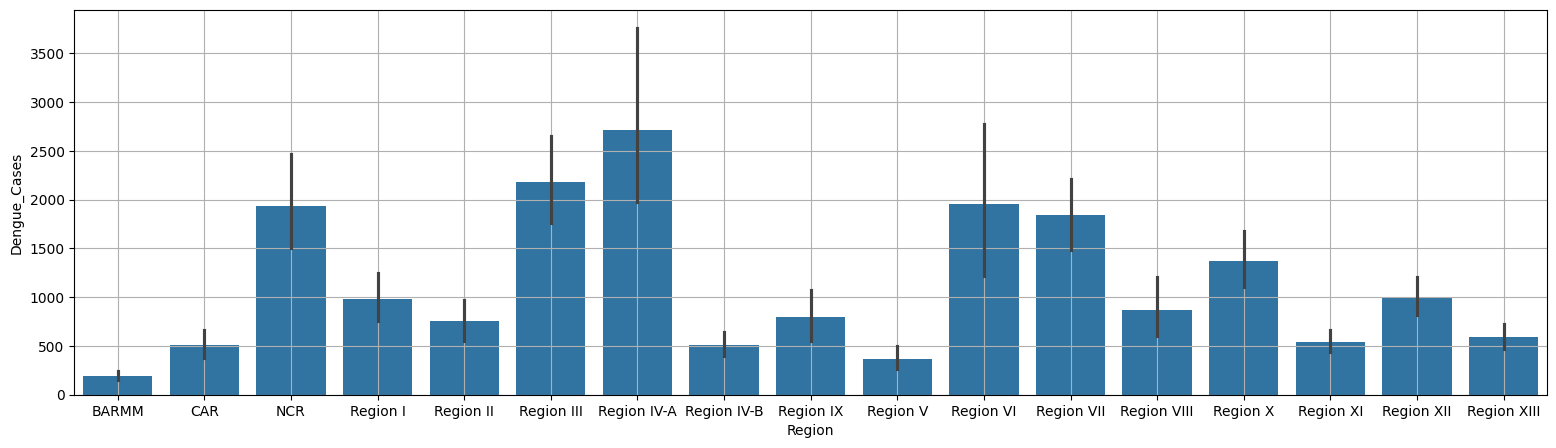

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
224,September,2019,Region IV-A,21658,48,0.22


In [34]:
sns.barplot(data=dengue, x="Region", y="Dengue_Cases")
plt.grid(True)
plt.gcf().set_size_inches(19,5)
plt.show()

In [35]:
a = dengue["Dengue_Cases"].max()
dengue[dengue["Dengue_Cases"] == a]

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
224,September,2019,Region IV-A,21658,48,0.22


#### INSIGHT 1
##### Region 4A, Region III and NCR are likely areas with a higher prevalence or incidence of dengue which could mean that the stated region may need more resources for dengue prevention and management

##### Th3se stated regions are known for its dense population which could be an attributes to its status of having the most dengue cases

<h4>INSIGHT 2</h4>
<p>NCR is among the top three with the most recorded cases. This could be attributed to its large population and toxic environment. Tondo which is known as the largest slum in the country's capital has a poor environmental management and dirty environent which is a suitable breeding for dengue-carrying mosquitos</p>

<h4>INSIGHT 3</h4>

<p>Barmm region has the lowest recorded dengue cases across all regions despite barmm region being suitable for mosquitoes to breed with its warmer temperature, rainfall and relative humidity</p>

<h3>INSIGHT 4</h3>


<p>CALABARZON or REGION 4A has the highest number of population which can explain its position as the region with the highest recorded dengue cases</p>
<p>On September 2019, 21,658 dengue cases were recorded with a mortality rate of 0.22%</p>

<a href="https://www.philatlas.com/regions.html">Region's populations</a>

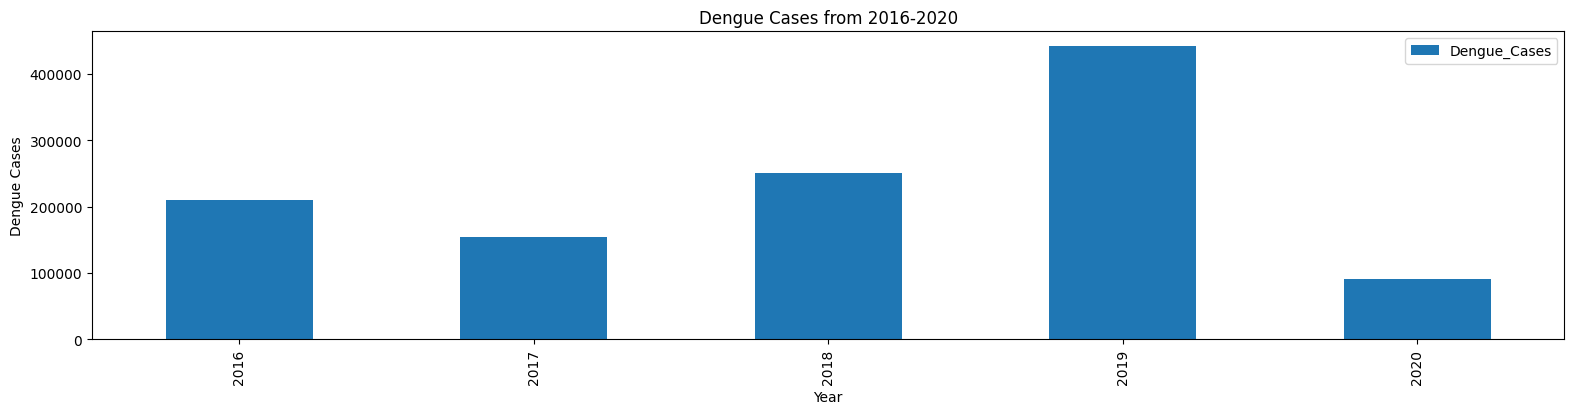

,Dengue_Cases
Year,
2016,209544
2017,154155
2018,250783
2019,441902
2020,91041


In [24]:
yearly_cases = dengue.groupby(["Year"])[["Dengue_Cases"]].sum()
yearly_cases.plot(kind="bar")
plt.title("Dengue Cases from 2016-2020")
plt.ylabel("Dengue Cases")
plt.xlabel("Year")
plt.gcf().set_size_inches(19,4)
plt.show()

yearly_cases

<h4>INSIGHT 5</h4>
<p>
Across all the record, 2019 was the peak year of dengue cases with a total of 441,902 cases which accounts for 38% of overall cases. In 2020, the dengue cases decline with 30% relative to the previous year
</p>

<!-- <p> -->
    ### total = 1,147,435
    ### 2019 = (441,902 / total) * 100 = 38%
    ### 2020 = (91,041 / total) * 100 = 7.9 = 8%
    ### decline = 38% - 8% = 30% drops
<!-- </p> -->

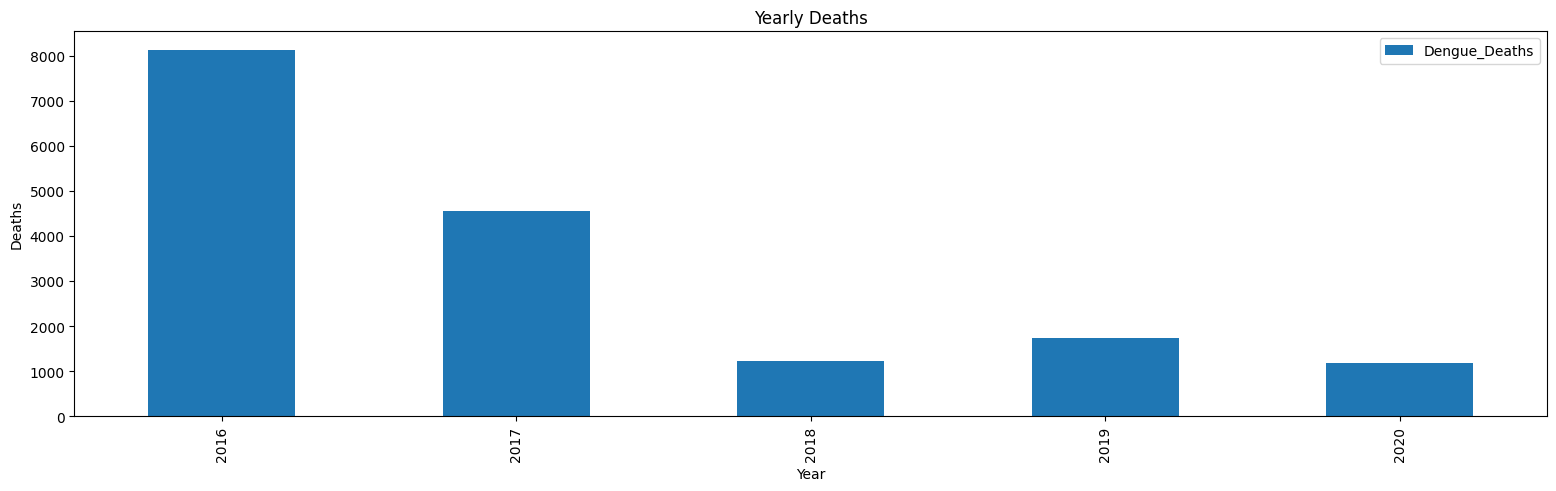

,Dengue_Deaths
Year,
2016,8127
2017,4563
2018,1226
2019,1733
2020,1195


In [40]:
yearly_death = dengue.groupby(["Year"])[["Dengue_Deaths"]].sum()
yearly_death.plot(kind="bar")
plt.gcf().set_size_inches(19,5)
plt.title("Yearly Deaths")
plt.ylabel("Deaths")
plt.show()
yearly_death

<h4>INSIGHT 6</h4>
<!-- <p>2016 is the peak year with the highest recorded deaths associated with denge, but steadily decline going forward</p> -->
<p>In 2016, the Philippines recorded the highest number of deaths associated with dengue with 8,127 death. This was a peak year which could be linked to a significant outbreak of dengue during that year</p>

<h4>INSIGHT 7</h4>
<p>In 2020, the dengue deaths significantly decreased into 1,195, the lowest recorded from 2016-2020. The low records could be attributed to events during that year. 2019-2020 is the period where the COVID 19; Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus rosed which caused the nations to undergo quarantine which results less activity and rates or stagnant water left unnoticed.</p>

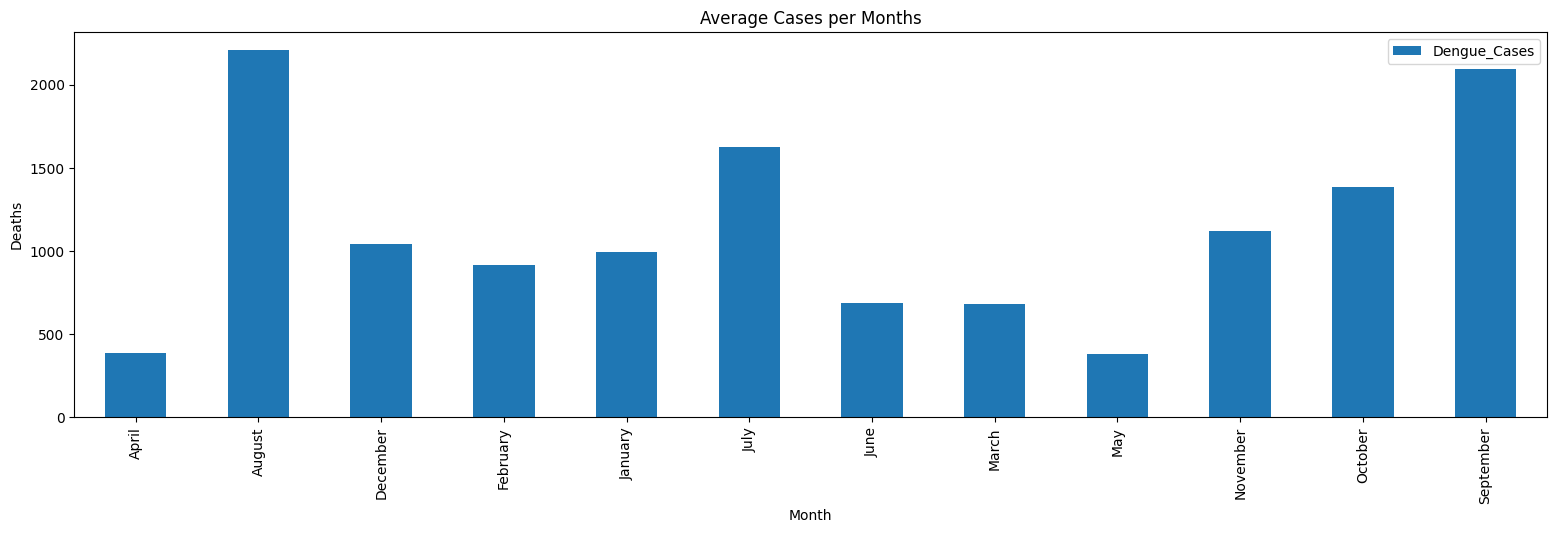

,Dengue_Cases
Month,
April,382.447059
August,2206.517647
December,1040.364706
February,915.305882
January,992.094118
July,1626.376471
June,683.647059
March,677.364706
May,381.023529


In [59]:
dengue.groupby(["Month"])[["Dengue_Cases"]].mean().plot(kind="bar")
plt.gcf().set_size_inches(19,5)
plt.title("Average Cases per Months")
plt.ylabel("Deaths")
plt.show()

dengue.groupby(["Month"])[["Dengue_Cases"]].mean()




<h4>INSIGHT 8</h4>
<p>August and September is the two with the most average cases. August and September belong to "Tag-ulan" season which could be a factor to stagnant water. During this month, the raining pattern could have been different, the interval between the raining pattern may cause the mosquito to breed into undisturbed stagnant water which could be cause a high a number of dengue cases</p>

<p>According to <a href="https://pmc.ncbi.nlm.nih.gov/articles/PMC5392638/#:~:text=Dengue%20is%20a%20major%20public,all%20regions%20of%20the%20country.&text=The%20country's%20outbreaks%20are%20largely,season%20(June%E2%80%93February).">Eduardo A Undurraga and Co.</a>, the country's dengue outbreak are largely seasonal, with most episodes occuring during the wet season (June-February)</p>

<h3>INSIGHT 9</h3>
<p>March, April, and May, these three months has the lowest average of dengue cases because relative to the statement from insight 8, these months belong to dry season which mean it has less stagnant water since a little to no rainfall occur during this season.</p>

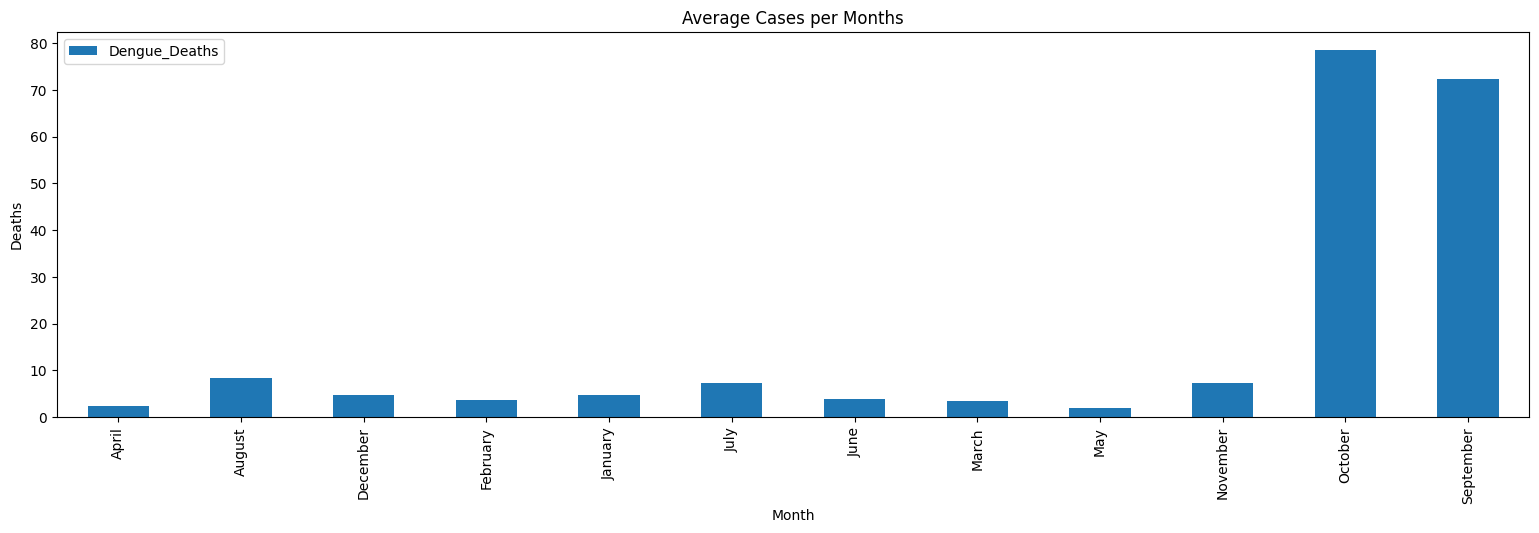

,Dengue_Deaths
Month,
April,2.352941
August,8.400000
December,4.752941
February,3.705882
January,4.635294
July,7.188235
June,3.788235
March,3.423529
May,1.905882


In [60]:
dengue.groupby(["Month"])[["Dengue_Deaths"]].mean().plot(kind="bar")
plt.gcf().set_size_inches(19,5)
plt.title("Average Cases per Months")
plt.ylabel("Deaths")
plt.show()

dengue.groupby(["Month"])[["Dengue_Deaths"]].mean()



<h4>INSIGHT 10</h4>
<p>October and September has the highest average deaths. Compared to other months, Octobe and September significantly differs from the rest with the rest having a 1 digit average death and 2 digit, minimum of 72 average deaths recorded from October and September</p>

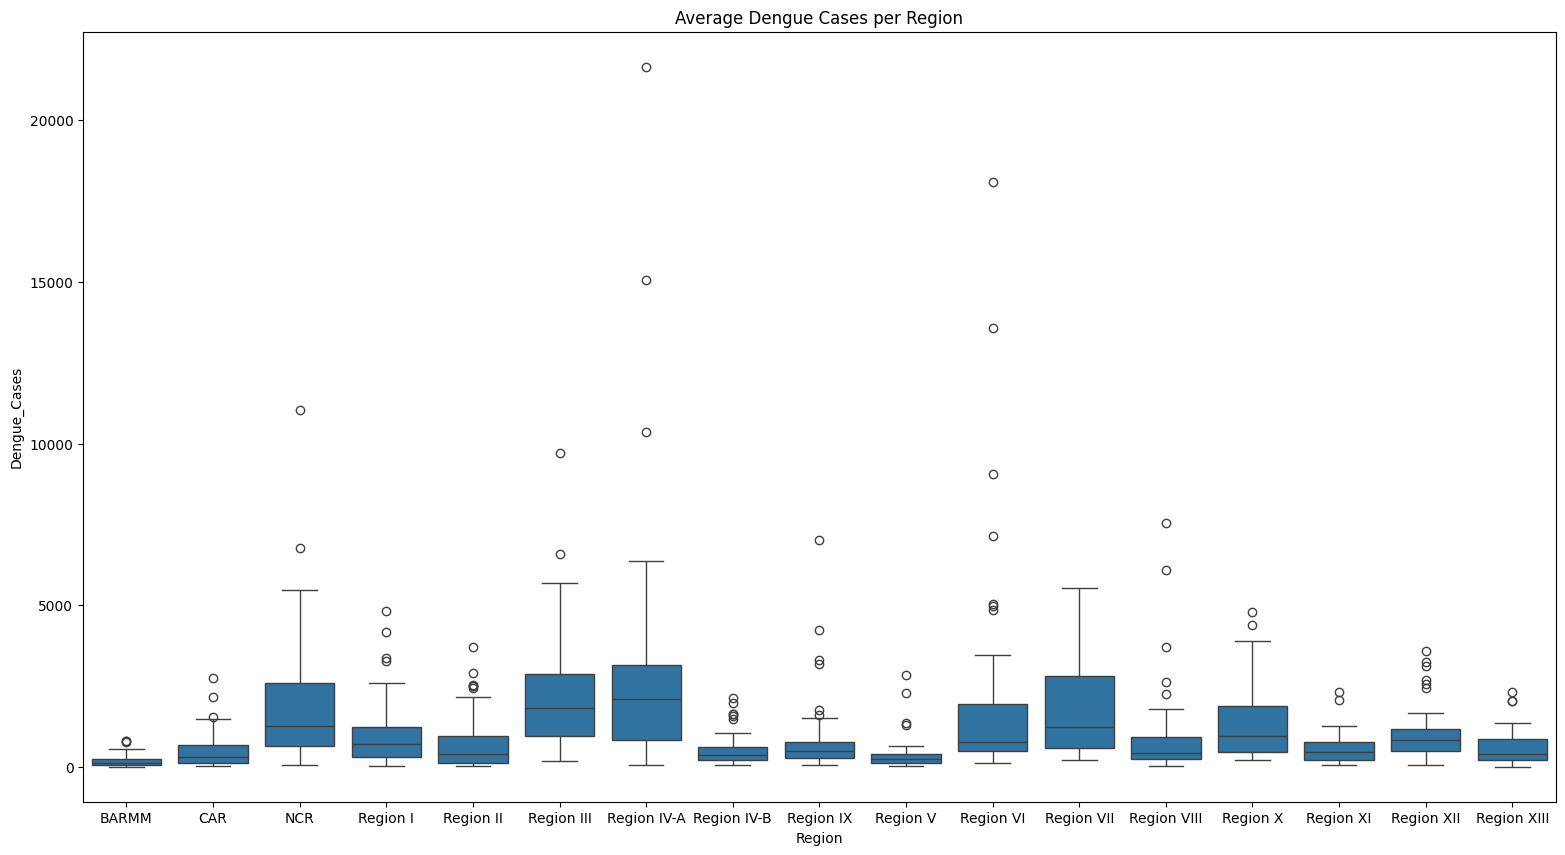

,Dengue_Cases
Region,
BARMM,192.283333
CAR,509.700000
NCR,1932.766667
Region I,984.433333
Region II,752.350000
Region III,2184.400000
Region IV-A,2717.150000
Region IV-B,514.150000
Region IX,796.350000


In [72]:
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.title("Average Dengue Cases per Region")
plt.show()

dengue.groupby(["Region"])[["Dengue_Cases"]].mean()


<h4>INSIGHT 11</h4>
<p>With an average of 2,717.2 dengue cases, Region IV-A (CALABARZON) had the greatest number, followed by Region III (Central Luzon) with 2,184.4 cases. These stated regions is known for large urban centers and highly populated areas, which are more vulnerable to dengue outbreaks. The number of cases in these areas may be connected or linked to several facots such as rapid urbanization/development and poor sanitation. The high population densityin these regions also contribute to the ease with which the virus can spread, resulting in more cases.</p>

<h4>INSIGHT 12</h4>
<p>
    In comparison, the BARMM region reported the lowest average of dengue cases, 192 average cases. This is highly different compared to other regions average reported cases this could be caused by low population density as the BARMM region is in a forestry environment compared to urbanized/developed regions
</p>

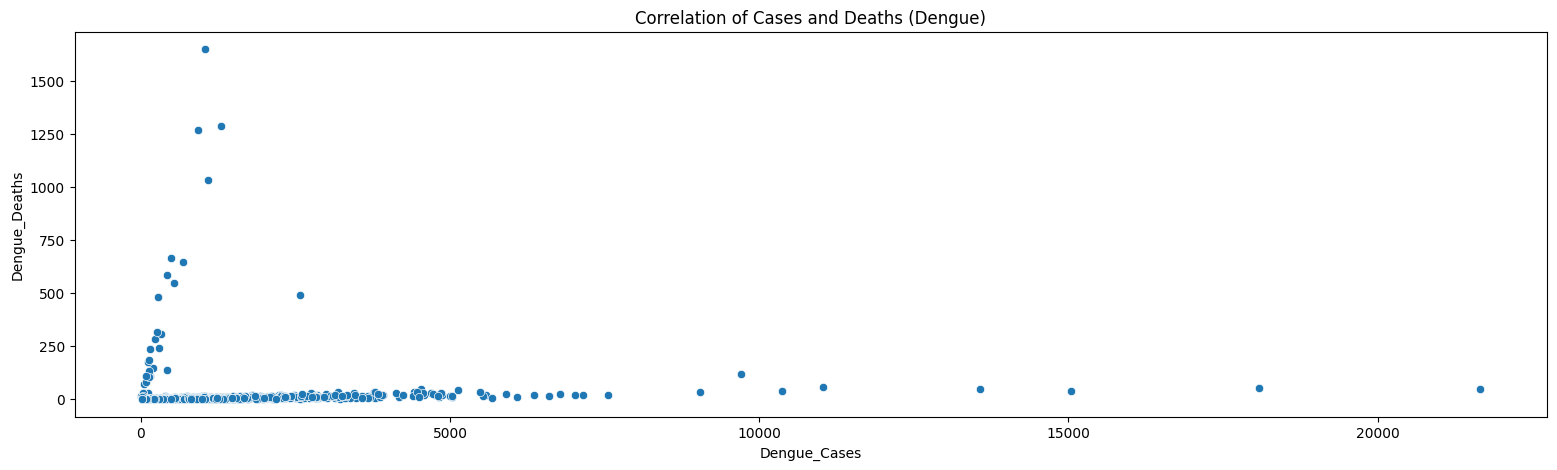

0.03832213720419488

In [76]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths")
plt.gcf().set_size_inches(19,5)
plt.title("Correlation of Cases and Deaths (Dengue)")
plt.show()


correlation = dengue["Dengue_Cases"].corr(dengue["Dengue_Deaths"])
correlation

<h4>INSIGHT 13</h4>
<p>There is a strong negative correlation with a value of 0.038 between dengue cases and dengue deaths which means that more dengue cases is not proportional to dengue deaths</p>

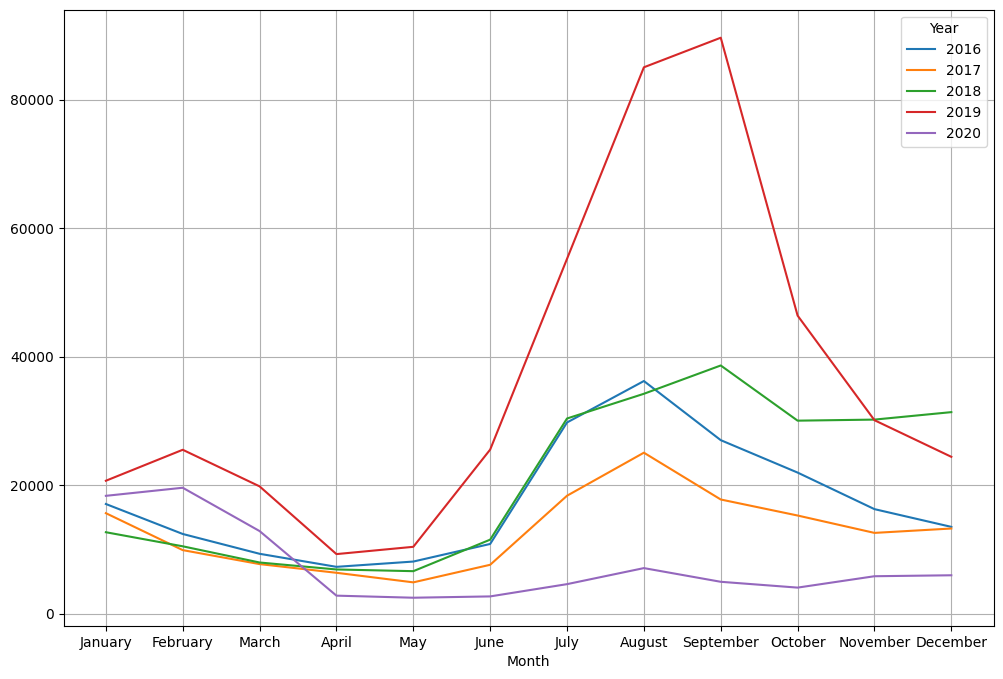

Year,2016,2017,2018,2019,2020
Month,,,,,
January,17052,15623,12657,20672,18324
February,12386,9872,10466,25494,19583
March,9300,7696,7944,19798,12838
April,7269,6343,6860,9252,2784
May,8092,4853,6594,10387,2461
June,10831,7589,11502,25523,2665
July,29744,18340,30363,55220,4575
August,36195,25039,34210,85038,7072
September,26990,17753,38617,89642,4941


In [77]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

monthly_cases.unstack()

<h4>Insight 14</h4>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

<h4>INSIGHT 15</h4>
<p>
Dengue cases based on the chart shows seasonal variation, from the range of 2016 to 2020, a continuous increase of dengue cases from May to September were recorded. This steady increase corresponds to rainy season, the month of May is the last month of dry season and September is the last month of Wet season, from this, dry to wet transition provides favorable conditions for mosquitoes to breed, leading to an increase dengue cases.</p>

<H4>INSIGHT 16</H4>
<p>
    In 2020, a decline of dengue cases started compared to the previous year, particularly from March to December, a significant decrease in cases were recorded which has a large gap compared to other years.
</p>

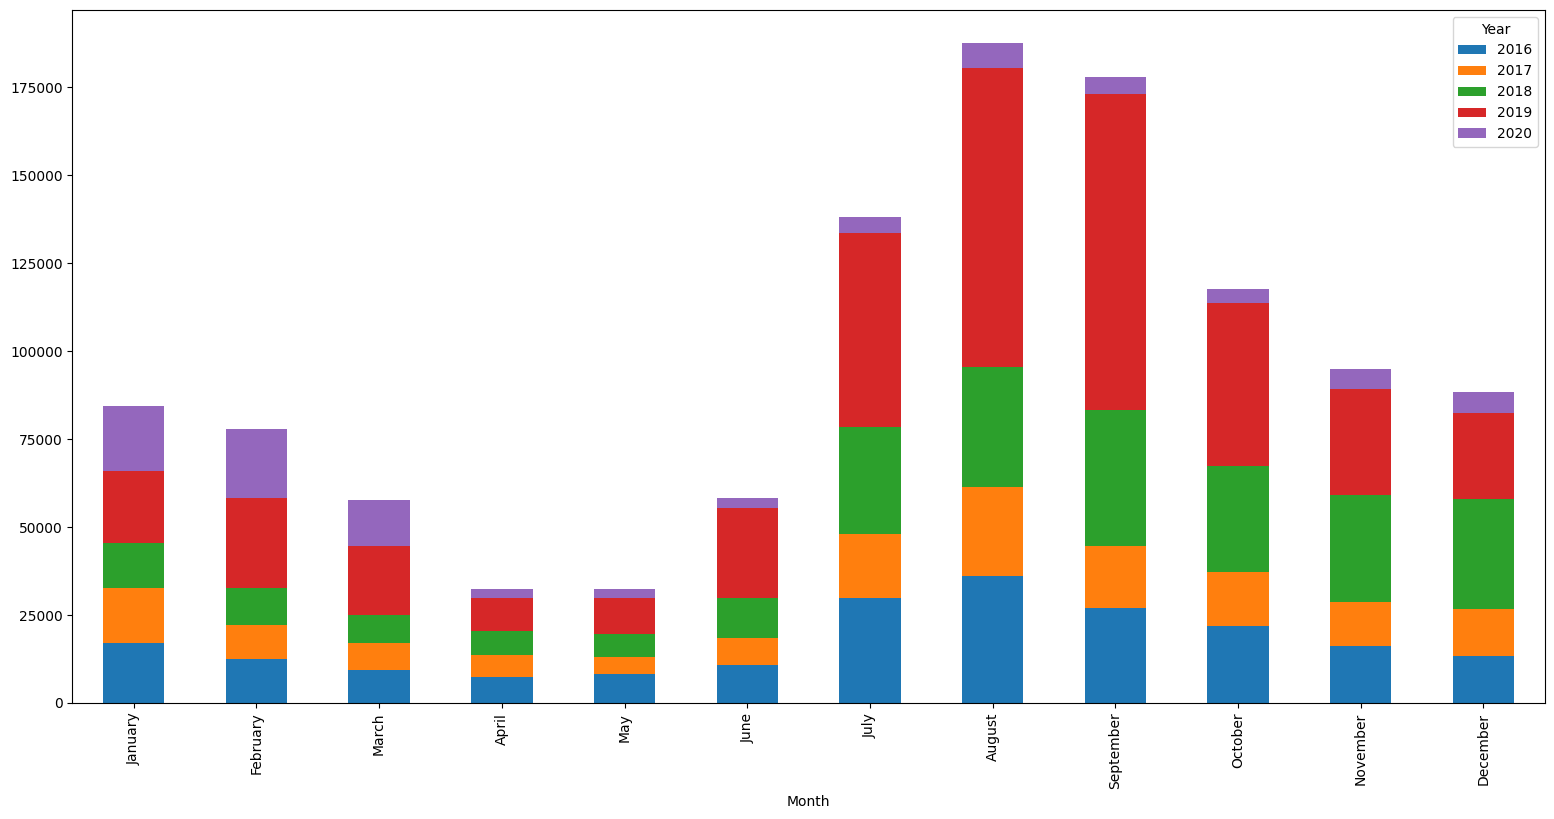

In [80]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(19,9)
plt.show()

<h4>INSIGHT 17</h4>
<p>Accumulatively, the Month of August has the highest recorded cases from 2016-2020</p>

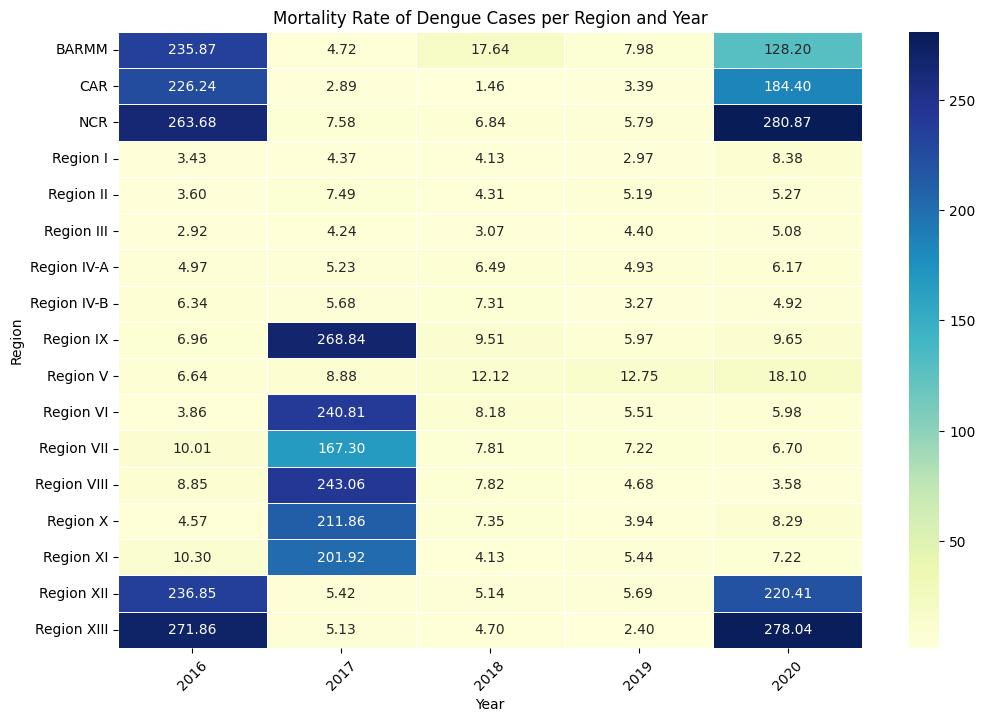

In [81]:
death_per_region = dengue.groupby(["Region", "Year"])["Mortality_Rate"].sum().reset_index()

death_per_region = death_per_region.pivot(index="Region", columns="Year", values="Mortality_Rate")
death_per_region = death_per_region.fillna(0)  # Replace NaN with 0
death_per_region = death_per_region.apply(pd.to_numeric, errors='coerce')

# # Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(death_per_region, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mortality Rate of Dengue Cases per Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()

<H4>INSIGHT 18</H4>
<p>

    In the year 2016, BARMM,CAR,NCR,REGION 12, AND REGION 13 has the highest mortality rate
    In the year 2017, REGION 6,7,8,9,10 and 11 has the highest or alarming mortality rate out of 17 regions
    In the year 2018 and 2019, no alarming mortality rate were recorded from all regions
    In the last year, 2020, BARMM, CAR, NCR, REGION 12, and 13 has the highest mortality rate out of 17 regions
    
</p>

<h4>INSIGHT 19</h4>
<p>Despite the year of 2018 and 2019 having the most recorded dengue cases, there records of death were low compared to other were which shows no alarming mortality rate</p>

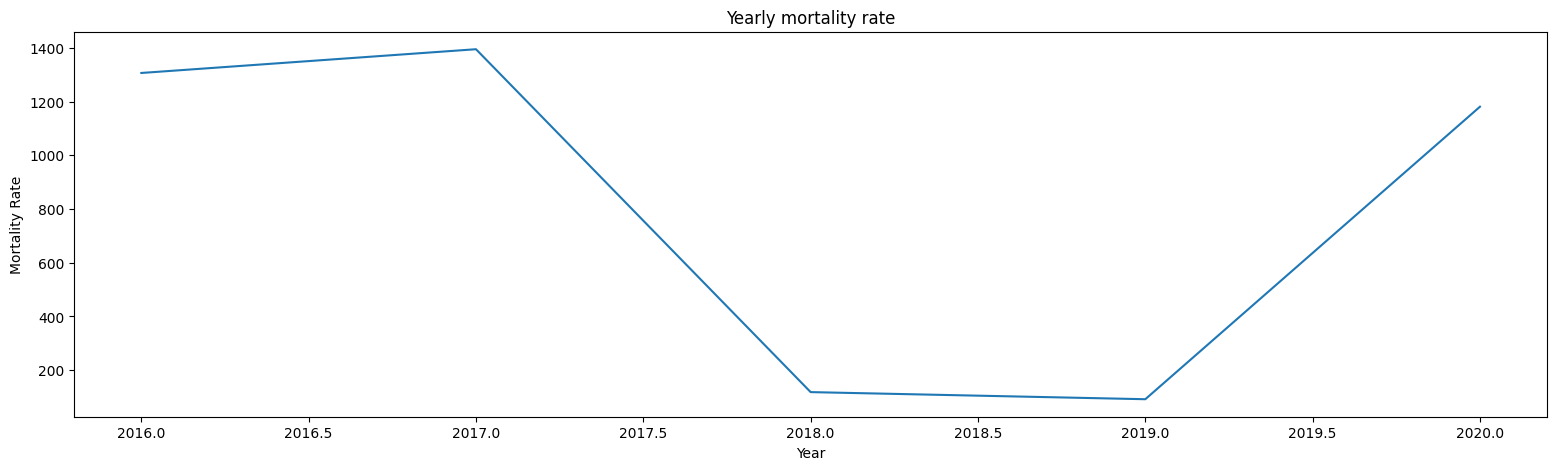

In [97]:
dengue.groupby(["Year"])["Mortality_Rate"].sum().plot(kind="line")
plt.title("Yearly mortality rate")
plt.ylabel("Mortality Rate")
plt.gcf().set_size_inches(19,5)

<h4>INSIGHT 20</h4>
<p>From 2017 to 2018, there's a rapid decline of dengue mortality rate and stayed low from 2019 until pandemic happends and the mortality spikes once again</p>